<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Week 11 Review - Solutions

 _**Author:** Noelle B. (DSI-DEN)_

---
We will review the learning objectives of each lesson this week and answer questions related to them.

---
## 11.01 Introduction to Neural Networks

### Identify the general structure of a neural network

**Q1.** What is the general structure of a neural network?

> **Answer:**  
Neural networks are comprised of an input layer, hidden layers, and an output layer. Each layer is comprised of a number of nodes.

### Define all of the common vocabulary associated with deep learning (Neuron, weight, bias, hidden layer, activation function, learning rate, epoch, etc.)

**Q2.** Define `neuron`.

> **Answer:**  
Neurons are the weights, bias term and activation function. NNs can have various hidden layers and each hidden layer can have various neurons. Each neuron has their own unique set of weights and bias term and potentially unique activation function in order to arrive at a single value that represents some kind of combination of all the fed in features.

**Q3.** Define `weight`.

> **Answer:**  
Values applied to features as they flow through the network to contribute to interaction. Weights are randomly initialized and adjusted according to gradient decent on our loss function. The weights function similar to coefficients in a linear or logistic regression in which the weights multiply the original value in order to affect how much each feature contributes to the interaction term that results from the activation function.

**Q4.** Define `bias`.

> **Answer:**  
Constant values that are added in to each neuron. These are also adjusted the same way the weights are, however they exist on their own and do not weight any other value.

**Q5.** Define `hidden layer`.

> **Answer:**  
1 or more neurons that sit in-between our input layer (original features) and our output layer (predictive function) that are responsible for transforming the data.

**Q6.** Define `activation function`.

> **Answer:**  
A function on the neuron that takes in the sum of all features after their weights have been applied plus the Bias term and returns a new value that will be used as a feature in the next layer.

**Q7.** Define `Learning Rate`.

> **Answer:**    
How large the steps are that we take when moving through our loss function in order to increase/decrease weights in order to decrease total loss. (Same as gradient Descent)

**Q8.** Define `epoch`.

> **Answer:**  
When our full set of training data fully forward and back propagates through our network.
- Feed the data through the network.
- Calculate the errors.
- Propagate backwards to adjust network to better fit the data via found errors.

### Understand forward and backward propogation

**Q9.** Briefly describe forward propogation.

> **Answer:**  
Forward propagation is the process of data flowing through the network in order to arrive at a predicted value.

**Q10.** Briefly describe backward propogation.

> **Answer:**  
Backward Propagation is the act of optimizing a network be working backwards through it, starting with the errors calculate and identifying the points in the network (weights or nodes) that are contributing most to the error and adjusting them accordingly.

---
## 11.02 Introduction to Keras

### Build a neural network from scratch using keras

**Q11.** Generate a basic neural network for a regression problem in keras using the generated data.

In [1]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# data
X, y = make_regression(n_samples=10000, n_features=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [2]:
# answer
model = Sequential()
model.add(Dense(32, 
                input_shape=(20,),
                activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=5, batch_size=512)

Train on 7500 samples, validate on 2500 samples
Epoch 1/5
7500/7500 [==============================] - 1s 101us/sample - loss: 39539.6856 - mae: 158.8467 - val_loss: 41404.9202 - val_mae: 163.9947
Epoch 2/5
7500/7500 [==============================] - 0s 9us/sample - loss: 39484.5990 - mae: 158.7350 - val_loss: 41345.8838 - val_mae: 163.8770
Epoch 3/5
7500/7500 [==============================] - 0s 8us/sample - loss: 39425.2211 - mae: 158.6145 - val_loss: 41281.1571 - val_mae: 163.7483
Epoch 4/5
7500/7500 [==============================] - 0s 8us/sample - loss: 39359.4748 - mae: 158.4811 - val_loss: 41206.4521 - val_mae: 163.5993
Epoch 5/5
7500/7500 [==============================] - 0s 8us/sample - loss: 39282.5156 - mae: 158.3238 - val_loss: 41119.5101 - val_mae: 163.4265


### Understand the differences in creating regression, binary classification, and multi-class classification ANN models

**Q12.** Which activation function should we use for the output layer of a regression NN?

> **Answer:**  
Linear/identity

**Q13.** Which activation function should we use for the output layer of a binary classification NN?

> **Answer:**  
Sigmoid

**Q14.** Which activation function should we use for the output layer of a multi-class classification NN?

> **Answer:**  
Softmax

### Visualize model training with matplotlib

**Q15.** Using the neural network below, visualize the training and testing loss.

In [5]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

# data
X, y = make_classification(n_samples=10_000, n_features=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

model = Sequential()
model.add(Dense(32,
                input_shape=(20,),
                activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')

history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=20, batch_size=512, verbose=0)

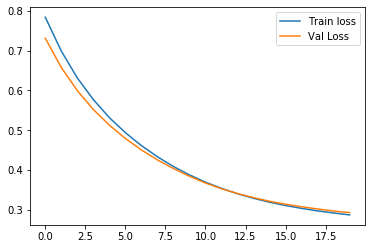

In [6]:
# answer
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

---
## 11.03 Deep Learning Regularization

### Explain how the three deep learning regularization techniques work (L1/L2 regularization, Dropout, Early stopping)

**Q16.** Describe L1/L2 regularization for deep learning models.

> **Answer:**  
- Incorporating either LASSO or Ridge regularization into back propagation is as simple as adding the regularization term to the loss function (ok, not very simple at all when you look at the math)
- L1 typically isn't used in NNs.
- L2 is much more popular and sometimes referred to as "weight decay".

**Q17.** Describe dropout.

> **Answer:**  
- The process of randomly removing nodes in training epochs to see how it affects the model. A NN with densly connected layers will have the tendency to overfit so we can utilize drop out in order better understand if nodes should be removed or kept. (Similar to how Random Forests reduce variance and overfitting.)
- Dropouts can occur at any epoch and the models "constant fear" of loosing a node at any time prevents the over adjustment of a weight for an epoch.

**Q18.** Describe early stopping.

>**Answer:**   
Compares how much the loss function is changes and stops the algorithm once it hits the point where the loss function starts to go up. This is done with the assumption that the first minimum that was hit it the global minimum.

### Implement these techniques in Keras

**Q19.** Using the data below, build a binary classification neural network in kearas using an early stopping technique.

In [16]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# data
X, y = make_classification(n_samples=10_000, n_features=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [17]:
# answer:
model_es = Sequential()

n_input = X_train_sc.shape[1]

model_es.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_es.add(Dense(1, activation='sigmoid'))

model_es.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

history_es = model_es.fit(
    X_train_sc,
    y_train,
    validation_data=(X_test_sc, y_test),
    epochs=10,
    batch_size=None,
    callbacks=[early_stop]
)

Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 1s 141us/sample - loss: 0.4754 - acc: 0.7913 - val_loss: 0.3569 - val_acc: 0.8696
Epoch 2/10
7500/7500 [==============================] - 1s 71us/sample - loss: 0.3237 - acc: 0.8780 - val_loss: 0.2998 - val_acc: 0.8872
Epoch 3/10
7500/7500 [==============================] - 1s 71us/sample - loss: 0.2932 - acc: 0.8895 - val_loss: 0.2862 - val_acc: 0.8940
Epoch 4/10
7500/7500 [==============================] - 1s 70us/sample - loss: 0.2793 - acc: 0.8977 - val_loss: 0.2757 - val_acc: 0.9012
Epoch 5/10
7500/7500 [==============================] - 1s 71us/sample - loss: 0.2671 - acc: 0.9063 - val_loss: 0.2653 - val_acc: 0.9036
Epoch 6/10
7500/7500 [==============================] - 1s 76us/sample - loss: 0.2567 - acc: 0.9161 - val_loss: 0.2554 - val_acc: 0.9092
Epoch 7/10
7500/7500 [==============================] - 1s 72us/sample - loss: 0.2483 - acc: 0.9223 - val_loss: 0.2494 - val_acc:

**Q20.** Using the data below, build a binary classification neural network in keras using a dropout technique.

In [11]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# data
X, y = make_classification(n_samples=10_000, n_features=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [13]:
# answer:
model_dropout = Sequential()


n_input = X_train_sc.shape[1]
n_hidden = n_input

model_dropout.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(1, activation='sigmoid'))

model_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history_dropout = model_dropout.fit(
    X_train_sc,
    y_train,
    validation_data=(X_test_sc, y_test), 
    epochs=10,
    batch_size=None
)

Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 2s 232us/sample - loss: 0.6889 - acc: 0.6175 - val_loss: 0.4745 - val_acc: 0.8284
Epoch 2/10
7500/7500 [==============================] - 1s 73us/sample - loss: 0.4626 - acc: 0.7907 - val_loss: 0.3504 - val_acc: 0.8720
Epoch 3/10
7500/7500 [==============================] - 1s 67us/sample - loss: 0.3797 - acc: 0.8424 - val_loss: 0.3104 - val_acc: 0.8836
Epoch 4/10
7500/7500 [==============================] - 0s 66us/sample - loss: 0.3560 - acc: 0.8588 - val_loss: 0.2972 - val_acc: 0.8876
Epoch 5/10
7500/7500 [==============================] - 1s 70us/sample - loss: 0.3359 - acc: 0.8715 - val_loss: 0.2905 - val_acc: 0.8920
Epoch 6/10
7500/7500 [==============================] - 1s 70us/sample - loss: 0.3235 - acc: 0.8753 - val_loss: 0.2865 - val_acc: 0.8952
Epoch 7/10
7500/7500 [==============================] - 0s 65us/sample - loss: 0.3179 - acc: 0.8820 - val_loss: 0.2812 - val_acc:

---
## 11.04 Convolutional Neural Networks

### Identify use cases for convolutional neural networks and when they are superior to other neural networks.

**Q21.** Identify use cases for CNNs.

> **Answer:**  
Convolutional NNs consider features related to one another via proximity, this makes them great for assessing pictures because they are able to break down a picture the way humans do, by focusing one specific areas of the photo.

### Describe convolutional and pooling layers.

**Q22.** What are convolutional layers?

>**Answer:**  
"A convolution is the simple application of a filter to an input that results in an activation. Repeated application of the same filter to an input results in a map of activations called a feature map, indicating the locations and strength of a detected feature in an input, such as an image." [source](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/)

**Q23.** What are pooling layers?

>**Answer:**  
Pooling layers allow us to compress output from the convolution layers.
- Max Pooling is typically the tactic used in the pooling layer. This identifies and takes the strongest/most important info for retention.
- Pooling is done independently across channels. (Each "node" has its own unique pooling)

### Define padding and filters.

**Q24.** Define padding.

>**Answer:**  
Given that the way edges flow over a picture an aspect of padding can be added.  This is essentially adding boarding cells of neutral values around a picture so that pixels that are in corners or along edges can be considered more often
- In the event there is something important in the corner of an image, without having padding that corner may only be considered once.
- Typically we as humans gravitate our focus towards the center of an image and work outward, they further away from the center objects are in a picture the less we notice them, think about what happens in the corners of pictures.  Its typically not a place you consciously look at when looking at a picture, padding tries to combat NNs from picking up on this same habit.

**Q25.** Define filters.

>**Answer:**  
Each filter can detect one type of feature in an image (like vertical edges).

### Fit CNNs in Keras.

**Q26.** Using the data below, fit a CNN in Keras.

In [18]:
import numpy as np
# For reproducibility
np.random.seed(2021)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [20]:
# answer:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6,            
                     kernel_size=(3, 3),     
                     activation='relu', 
                     input_shape=(28, 28, 1)))

cnn_model.add(MaxPooling2D(pool_size=(2, 2))) 

cnn_model.add(Conv2D(16,
                     kernel_size = (3, 3),
                     activation='relu'))

cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))

cnn_model.add(Dense(10, activation='softmax'))

cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=256,
                        validation_data=(X_test, y_test),
                        epochs=10,
                        verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 279us/sample - loss: 1.6877 - accuracy: 0.8486 - val_loss: 0.2803 - val_accuracy: 0.9427
Epoch 2/10
60000/60000 [==============================] - 18s 302us/sample - loss: 0.2107 - accuracy: 0.9524 - val_loss: 0.1762 - val_accuracy: 0.9600
Epoch 3/10
60000/60000 [==============================] - 20s 340us/sample - loss: 0.1267 - accuracy: 0.9677 - val_loss: 0.1468 - val_accuracy: 0.9674
Epoch 4/10
60000/60000 [==============================] - 20s 341us/sample - loss: 0.0872 - accuracy: 0.9767 - val_loss: 0.1305 - val_accuracy: 0.9704
Epoch 5/10
60000/60000 [==============================] - 19s 325us/sample - loss: 0.0652 - accuracy: 0.9814 - val_loss: 0.1132 - val_accuracy: 0.9743
Epoch 6/10
60000/60000 [==============================] - 17s 278us/sample - loss: 0.0476 - accuracy: 0.9856 - val_loss: 0.1154 - val_accuracy: 0.9731
Epoch 7/10
60000/60000 [====================

### Understand how edge detection works in CNNs. (optional)

**Q27.** (Optional) How does edge detection work in a CNN?

> **Answer:**  
- An edge is identified by discontinuity in an image typically in color.
- When we pass our weights window over a panel of data in a picture we transform and map the image into smaller dimensions.
- Our Window will have conflicting/balanced weights on each side of it, one side very positive and one side very negative. If there is a significant difference in color/greyscale (what we would interpret as a edge). When the window passes over it, the weights applied on each side of the window will no longer neutral out and instead result in a significant positive or negative value indicating there is a drastic difference in shading from one side of the window to another.

---
## 11.05 Recurrent Neural Networks

### Design, train and evaluate an RNN model

**Q28.** Briefly describe how an RNN model works.

> **Answer:**  
"RNNs can take one or more input vectors and produce one or more output vectors and the output(s) are influenced not just by weights applied on inputs like a regular NN, but also by a “hidden” state vector representing the context based on prior input(s)/output(s). So, the same input could produce a different output depending on previous inputs in the series." [source](https://towardsdatascience.com/recurrent-neural-networks-d4642c9bc7ce)

**Q29.** What are some use cases of RNNs?

> **Answer:**  
Natural language processing, time series

---
## 11.06 GridSearch with Keras

### Learn how to use keras's scikit_learn wrappers.

**Q30.** What do kera's scikit_learn wrappers help with?

> **Answer:**  
These allow us to use sklearn tools such as gridseach with a neural network built in keras.

### Use GridSearchCV to tune a keras model

**Q31.** Use the given data to tune a keras regression model using GridSearchCV.

In [21]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

X, y = make_regression(n_samples=10_000, n_features=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [22]:
# Answer:
def model_func(layer_one_neurons=32, layer_two_neurons=32):
    model = Sequential()
    
    model.add(Dense(layer_one_neurons, activation='relu', input_shape=(20,)))
    
    model.add(Dense(layer_two_neurons, activation='relu'))
    
    model.add(Dense(1, activation=None))
    
    model.compile(loss='mse', optimizer='adam')
    
    return model

nn = KerasRegressor(build_fn=model_func, batch_size=512, verbose=0)

params = {
    'epochs': [50],
    'layer_one_neurons': [32],
    'layer_two_neurons': [32]
}

gs = GridSearchCV(nn, param_grid=params, cv=2)
gs.fit(X_train_sc, y_train)
print(gs.best_score_)
gs.best_params_

-1503.1744921223958


{'epochs': 50, 'layer_one_neurons': 32, 'layer_two_neurons': 32}